In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sequence_jacobian import simple, create_model
from sequence_jacobian.utilities.drawdag import drawdag

# Problem 2

### Question 1

In [2]:
@simple
def firm(K, n, a, alpha, delta):
    r = alpha * a * (K(-1) / n) ** (alpha-1) - delta
    w = (1 - alpha) * a * (K(-1) / n) ** alpha
    Y = a * K(-1) ** alpha * n ** (1 - alpha)
    return r, w, Y

@simple
def household(K, n, w, eis, frisch, b, delta):
    C = (w / b / n ** (1 / frisch)) ** eis
    I = K - (1 - delta) * K(-1)
    return C, I

@simple
def mkt_clearing(r, C, Y, I, K, n, w, eis, beta):
    goods_mkt = Y - C - I
    euler = C ** (-1 / eis) - beta * (1 + r(+1)) * C(+1) ** (-1 / eis)
    walras = C + K - (1 + r) * K(-1) - w * n
    return goods_mkt, euler, walras

In [3]:
rbc = create_model([household, firm, mkt_clearing], name="rbc_problem_2")

In [4]:
calibration = {"n": 0.33, "a": 1., "r": 0.023, "eis": 0.5, "frisch": 1., "delta": 0.0178, "alpha": 0.33}
unknowns_ss = {"b": 8.766, "beta": 0.99, "K": 17.12, "a": 1.}
targets_ss = {"goods_mkt": 0., "r": 0.023, "euler": 0., "Y": 1.22}

ss = rbc.solve_steady_state(calibration, unknowns_ss, targets_ss, solver="hybr")

In [5]:
print(f"Goods market clearing: {ss['goods_mkt']},\nEuler equation: {ss['euler']},\nWalras: {ss['walras']}")

Goods market clearing: 2.220446049250313e-16,
Euler equation: 1.1102230246251565e-16,
Walras: 1.4432899320127035e-15


In [11]:
unknowns = ['K', 'n']
targets = ['euler', 'goods_mkt']
inputs = ['a']

G = rbc.solve_jacobian(ss, unknowns, targets, inputs, T=200)

In [12]:
T, impact, rho = 200, 0.01, 0.9
da = np.zeros((T, 2))
da[0, 0] = impact * ss['a']
da[:, 1] = impact * ss['a'] * rho**np.arange(T)

In [13]:
var_list = ["Y", "n", "C", "I", "K", "w", "r"]

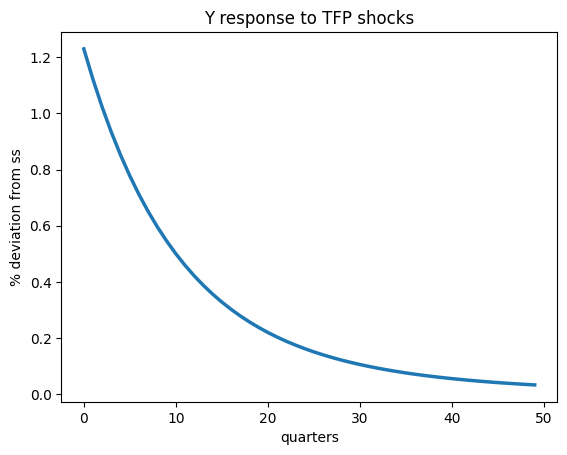

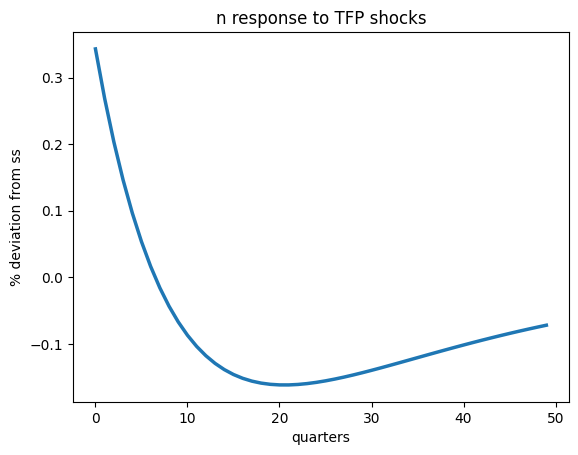

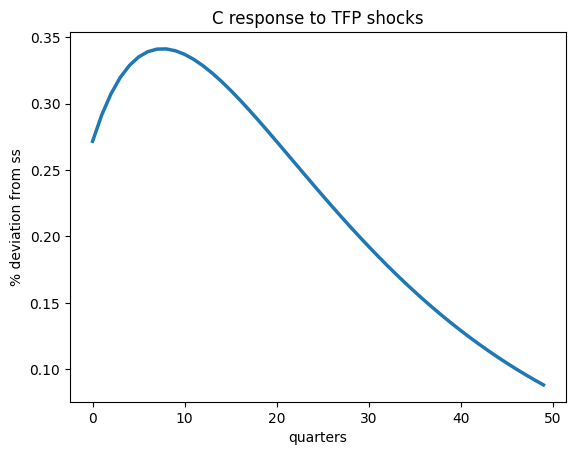

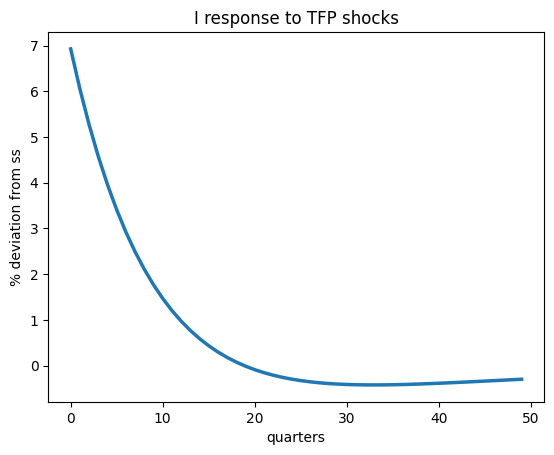

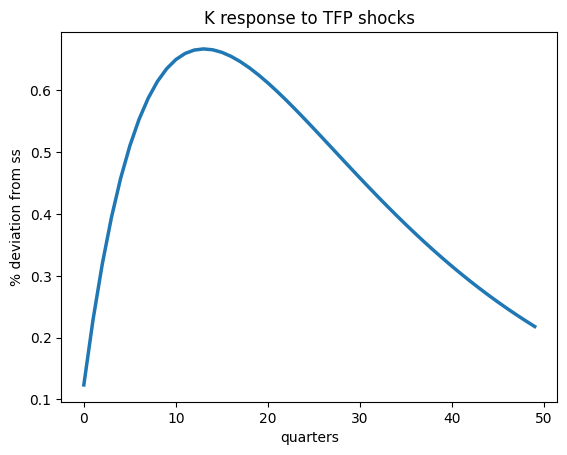

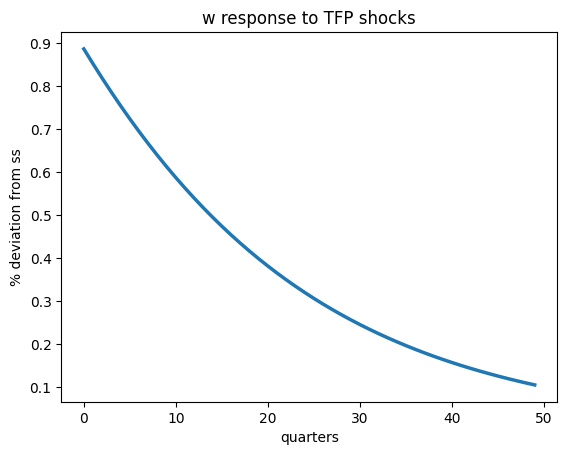

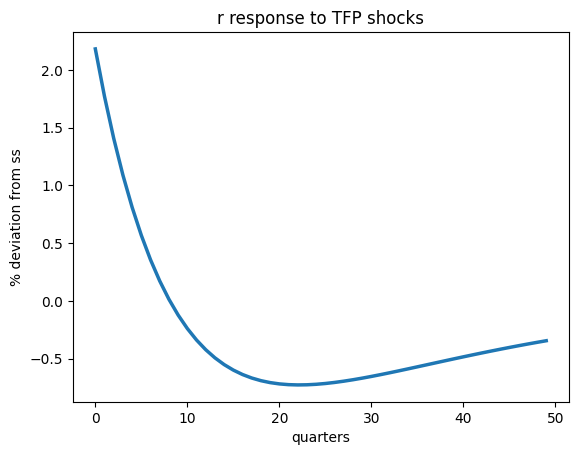

In [14]:
for var in var_list:
    dVal = 100 * G[var]['a'] @ da / ss[var]
    plt.plot(dVal[:50, 1], linewidth=2.5)
    plt.title(f'{var} response to TFP shocks')
    plt.ylabel('% deviation from ss')
    plt.xlabel('quarters')
    plt.show()

### Question 2

In [58]:
burn = 51
T = 200
A_mat = np.zeros((100, T + burn))
dA_mat = np.zeros((100, T + burn))

K_mat = np.zeros((100, T))
K_mat[:,0] = ss['K']

C_mat = np.zeros((100, T))
C_mat[:,0] = ss['C']

Y_mat = np.zeros((100, T))
Y_mat[:,0] = ss['Y']

n_mat = np.zeros((100, T))
n_mat[:,0] = ss['n']

for seq in range(100):
    for t in range(1, T + burn):
        A_mat[seq, t] = rho*A_mat[seq, t-1] + np.random.normal(0,impact)
        dA_mat[seq, t] = A_mat[seq, t] - A_mat[seq, t-1] 

for seq in range(100):
    for t in range(1, T):
        K_mat[seq, t] = K_mat[seq, t-1] + G['K']['a'][t, 0] * dA_mat[seq, T - t]
        

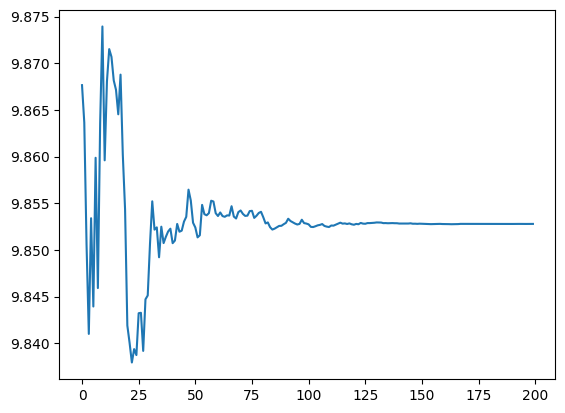

In [60]:
plt.plot(K_mat[1, :])

In [54]:
G['K']['a'][0, 0]

1.3946105806223223

In [55]:
dA_mat[1, 250 - 1]

0.0009996365708781745